In [3]:
import numpy as np
import simulation_manager, results_annalysis
import matplotlib.pyplot as plt
import pandas as pd
import max_arb_tuning
import itertools

## Création de l'instance

In [4]:
J = [
    [0, 4, 1.1, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0]
]
J = np.array(J)

mask = J.copy()
mask[mask>0]=1
mask[mask==0]=0

J = -np.log(J)
# J[J==np.inf] = 1
H = np.zeros(shape=5)
J

/var/folders/yg/x9721f3x1x32ymx9lck7xw900000gn/T/ipykernel_4726/1573872854.py:14: RuntimeWarning: divide by zero encountered in log
  J = -np.log(J)


array([[        inf, -1.38629436, -0.09531018,         inf,         inf],
       [        inf,         inf,         inf,         inf, -0.        ],
       [        inf,         inf,         inf,         inf,         inf],
       [-0.        ,         inf,         inf,         inf,         inf],
       [        inf,         inf,         inf, -0.        ,         inf]])

In [5]:
mask

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

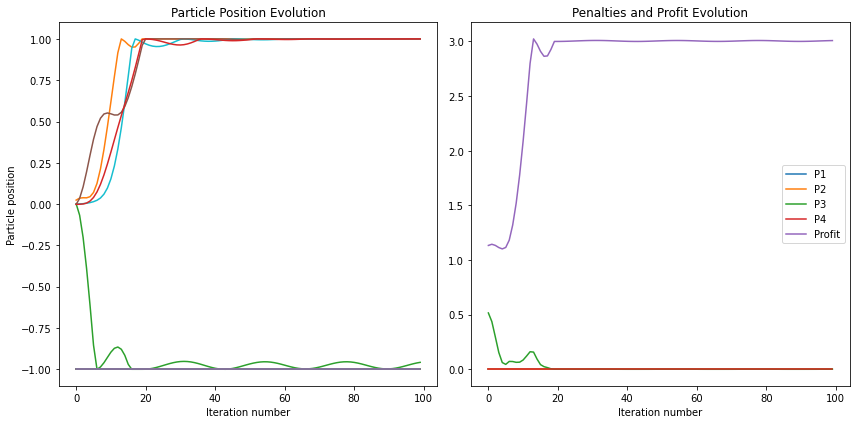

(array([ 0.00000000e+00,  0.00000000e+00,  8.79123749e-04,  0.00000000e+00,
         3.00800089e+00, -3.00712177e+00]),
 array([[-1.        ,  1.        , -0.958069  , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,  0.99979489],
        [-1.        , -1.        , -1.        , -1.        , -1.        ],
        [ 1.        , -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ,  0.99997975, -1.        ]]))

In [6]:
max_arb_tuning.solve_max_arb(J, H, [1, 1, 1, 1, 1], 100, step=0.2, mask=mask, plot=True)

In [10]:
sol = np.array([[-1.        ,  1.        , -1.        , -1.        , -1],
        [-1.        , -1.        , -1.        , -1.        ,  0.99969487],
        [-1.        , -1.        , -1.        , -1.        , -1.        ],
        [ 0.99971534, -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ,  0.99996514, -1.        ]])
sol = np.sign(sol)
np.where(sol==1)

(array([0, 1, 3, 4]), array([1, 4, 0, 3]))

In [5]:
# Generating all combinations of [a, b, c, d, e] where each can range from 0 to 10
lambdas = list(itertools.product(range(11), repeat=5))
lambdas = [list(lbd) for lbd in lambdas[1:]]
len(lambdas)

161050

In [30]:
results = np.zeros(shape=(10000, 6))
for i in range(10000):
    lbd = lambdas[i]
    result = max_arb_tuning.solve_max_arb(J, H, lbd, 20, step=0.2, mask=mask, plot=False)
    results[i] = result

In [31]:
results = pd.DataFrame(results, columns=['P1', 'P2', 'P3', 'P4', 'Proffit', 'Total_cost'])
results

,P1,P2,P3,P4,Proffit,Total_cost
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
results[results['Proffit']>0][results['P3']==0][results['P2']==0]

/var/folders/yg/x9721f3x1x32ymx9lck7xw900000gn/T/ipykernel_31756/2989431098.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results[results['Proffit']>0][results['P3']==0][results['P2']==0]
/var/folders/yg/x9721f3x1x32ymx9lck7xw900000gn/T/ipykernel_31756/2989431098.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results[results['Proffit']>0][results['P3']==0][results['P2']==0]


,P1,P2,P3,P4,Proffit,Total_cost


## Nouveau: Choix des fonctions `temperature`, `a` et `pas` personalisées

Pour expérimenter plus vite

In [9]:
num_iterations = 200

def pumpuing_rate(self, t):
    return t/num_iterations

lbds = [2, 1, 1, 0, 1]

## Simulation avec des paramètres choisis

In [10]:
manager = simulation_manager.SimulationManager(step_size=0.1, num_iterations=num_iterations, num_simulations=80, J=J, H=H, pumping_rate=pumpuing_rate, stopping_criterion=0, save_states_history=True, save_energies_history=False, n_threads=1, savetofile=False, lambdas=lbds)

In [11]:
states, energies, last_states, last_energies = manager.run_simulation()

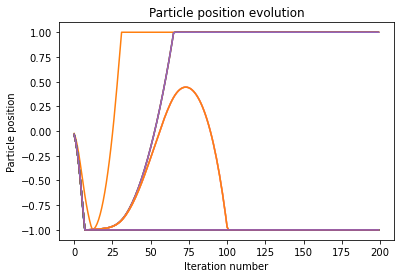

In [12]:
speeds = states[:, :, :, 1]
positions = states[:, :, :, 0]
n_cond_init, n_particle,  n_iterration = positions.shape 
abcisses = np.arange(n_iterration)

for i in range(n_particle):
    pos = positions[1, i, :]
    plt.plot(abcisses, pos)
    plt.xlabel("Iteration number")
    plt.ylabel("Particle position")
    plt.title("Particle position evolution")

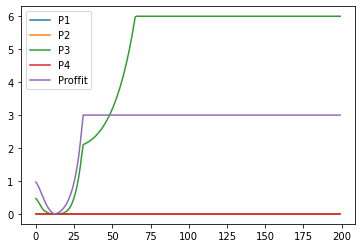

In [13]:
def penalties_and_proffit(S):
    # P1 calculation
    P1 = np.sum(np.sum(S * S.T, axis=1) - np.diag(S * S.T))

    # P2 calculation
    P2 = np.sum(np.sum(S * S.T, axis=0) - np.diag(S * S.T))

    # P3 calculation
    sum_row = np.sum(S, axis=1)
    sum_col = np.sum(S, axis=0)
    P3 = np.sum((sum_row - sum_col) ** 2)

    # P4 calculation
    P4 = np.sum(S * S.T)

    coeffs = J
    coeffs[coeffs>=0] = 0
    proffit = np.exp(-(coeffs * S).sum()) - 1

    return [P1, P2, P3, P4, proffit, P1+P2+P3+P4-proffit]

pen_proff = []
for t in range(num_iterations):
    S = states[14, :, t, 0].reshape((5,5))
    S = (S+1)/2
    S = S*mask
    pen_proff.append(penalties_and_proffit(S))

pen_proff=np.array(pen_proff).T

plt.plot(abcisses, pen_proff[0])
plt.plot(abcisses, pen_proff[1])
plt.plot(abcisses, pen_proff[2])
plt.plot(abcisses, pen_proff[3])
plt.plot(abcisses, pen_proff[4])
# plt.plot(abcisses, pen_proff[5])
plt.legend(['P1', 'P2', 'P3', 'P4', 'Proffit'])

In [14]:
pen_proff.shape

(6, 200)

In [15]:
solutions = last_states[:, :, 0]

In [16]:
solutions[10]

array([-1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [17]:
shaped_solutions = []
for i in range(solutions.shape[0]):
    shaped_solution = solutions[i].reshape((5,5))
    shaped_solution = (shaped_solution+1)/2
    shaped_solutions.append(shaped_solution)

shaped_solutions = np.array(shaped_solutions)

In [18]:
results = []

for i in range(solutions.shape[0]):
    S = shaped_solutions[i]
    results.append(penalties_and_proffit(S))

results = np.array(results)

In [19]:
results.mean(axis=0)

array([ 0.,  0., 20.,  0.,  3., 17.])

<AxesSubplot:>

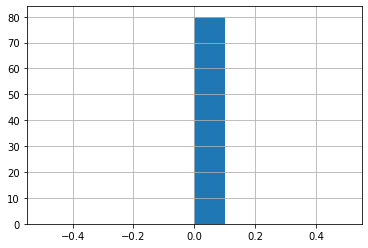

In [20]:
resultsdf = pd.DataFrame(results, columns=['P1', 'P2', 'P3', 'P4', 'Ptotal', 'Proffit'])
resultsdf['P4'].abs().hist()

In [21]:
resultsdf

,P1,P2,P3,P4,Ptotal,Proffit
0,0.0,0.0,20.0,0.0,3.0,17.0
1,0.0,0.0,20.0,0.0,3.0,17.0
2,0.0,0.0,20.0,0.0,3.0,17.0
3,0.0,0.0,20.0,0.0,3.0,17.0
4,0.0,0.0,20.0,0.0,3.0,17.0
...,...,...,...,...,...,...
75,0.0,0.0,20.0,0.0,3.0,17.0
76,0.0,0.0,20.0,0.0,3.0,17.0
77,0.0,0.0,20.0,0.0,3.0,17.0
78,0.0,0.0,20.0,0.0,3.0,17.0


In [22]:
good_sols_counter = 0
for result in results:
    if list(result[:4]) == [0, 0, 0 ,0]:
        good_sols_counter += 1

good_sols_counter/results.shape[0]*100

0.0

In [23]:
lines = np.where(solutions[0].reshape((5,5))==1)
mat = np.array([lines[0], lines[1]]).T
mat += 1

In [24]:
mat

array([[1, 2],
       [1, 3],
       [1, 4],
       [1, 5]])

In [34]:
n = 5
B = [
    [0, 2, 1, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0]
]
B = np.array(B)
C = np.zeros((5,5))

In [39]:
C + np.sum(B, axis=1)[:, None]

array([[3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [26]:
# term 1
C += 2*np.sum(B, axis=0)
# term 2
C += 2*np.sum(B, axis=1)[:, None]

In [27]:
# term 3
C += 2*np.sum(B.T, axis=0)-np.sum(B, axis=0)+np.sum(B.T, axis=1)[:, None]-np.sum(B, axis=1)[:, None]

In [28]:
# term 4
C += B.T
C += B